<Figure size 1200x600 with 0 Axes>

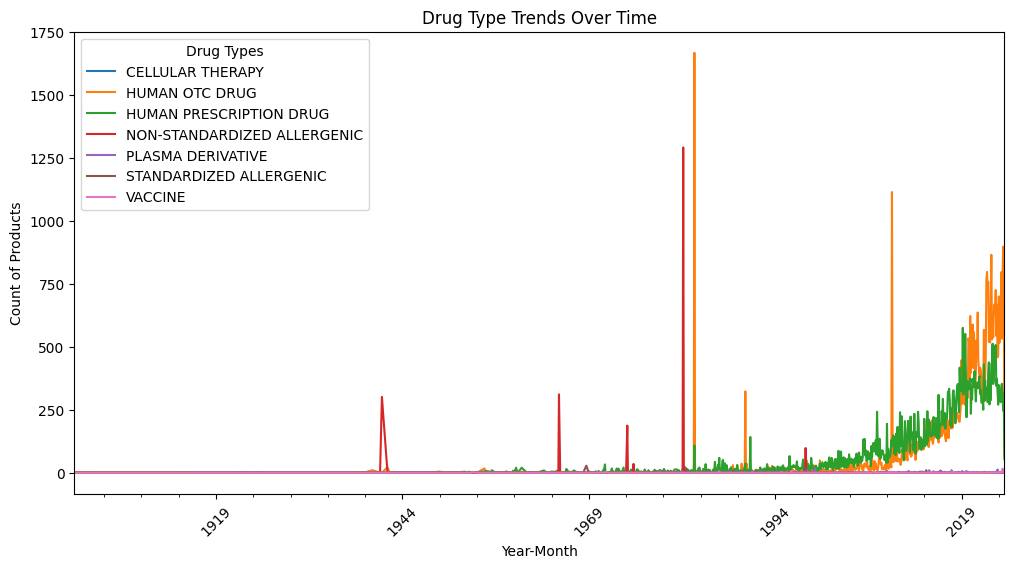

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import numpy as np


product_df['STARTMARKETINGDATE'] = pd.to_datetime(product_df['STARTMARKETINGDATE'], errors='coerce')


product_df['YearMonth'] = product_df['STARTMARKETINGDATE'].dt.to_period('M')


monthly_sales = product_df.groupby(['YearMonth', 'PRODUCTTYPENAME']).size().reset_index(name='count')


monthly_sales_pivot = monthly_sales.pivot(index='YearMonth', columns='PRODUCTTYPENAME', values='count')


monthly_sales_pivot.fillna(0, inplace=True)

plt.figure(figsize=(12,6))
monthly_sales_pivot.plot(kind='line', figsize=(12,6))
plt.title('Drug Type Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
plt.legend(title='Drug Types')
plt.show()



In [9]:
print(forecast_2025)

         CELLULAR THERAPY  HUMAN OTC DRUG  HUMAN PRESCRIPTION DRUG  \
2025-01               NaN             NaN                      NaN   
2025-02               NaN             NaN                      NaN   
2025-03               NaN             NaN                      NaN   
2025-04               NaN             NaN                      NaN   
2025-05               NaN             NaN                      NaN   
2025-06               NaN             NaN                      NaN   
2025-07               NaN             NaN                      NaN   
2025-08               NaN             NaN                      NaN   
2025-09               NaN             NaN                      NaN   
2025-10               NaN             NaN                      NaN   

         NON-STANDARDIZED ALLERGENIC  PLASMA DERIVATIVE  \
2025-01                          NaN                NaN   
2025-02                          NaN                NaN   
2025-03                          NaN                

In [10]:
print(monthly_sales_pivot.tail())


PRODUCTTYPENAME  CELLULAR THERAPY  HUMAN OTC DRUG  HUMAN PRESCRIPTION DRUG  \
YearMonth                                                                    
2024-06                       0.0           532.0                    353.0   
2024-07                       0.0           773.0                    306.0   
2024-08                       1.0           897.0                    246.0   
2024-09                       0.0           866.0                    315.0   
2024-10                       0.0            72.0                     54.0   

PRODUCTTYPENAME  NON-STANDARDIZED ALLERGENIC  PLASMA DERIVATIVE  \
YearMonth                                                         
2024-06                                  0.0                0.0   
2024-07                                  0.0                0.0   
2024-08                                  0.0                0.0   
2024-09                                  0.0                0.0   
2024-10                                  0.0       

In [11]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(monthly_sales_pivot['HUMAN PRESCRIPTION DRUG'], trend='add', seasonal=None, seasonal_periods=12)
model_fit = model.fit()

# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)
print(forecast)


2024-11    569.611039
2024-12    569.992339
2025-01    570.373639
2025-02    570.754939
2025-03    571.136239
2025-04    571.517539
2025-05    571.898839
2025-06    572.280139
2025-07    572.661439
2025-08    573.042739
2025-09    573.424039
2025-10    573.805339
Freq: M, dtype: float64


C:\Users\j7902\AppData\Local\Temp\ipykernel_13440\3191509038.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2025-01', periods=12, freq='M')


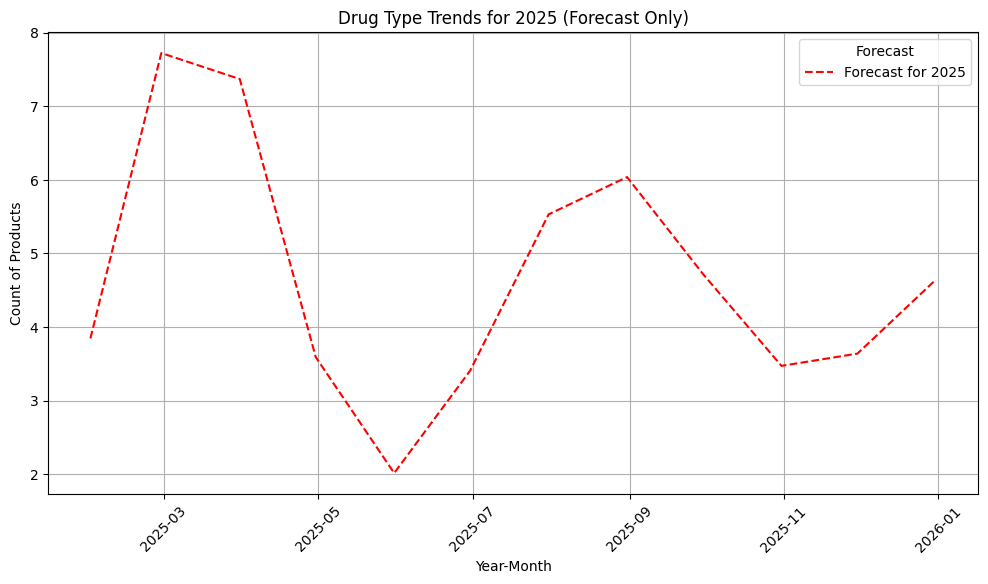

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you've already generated the forecast for 2025
forecast_2025 = model_fit.forecast(steps=12)

# Create a date range for the forecast
forecast_dates = pd.date_range(start='2025-01', periods=12, freq='M')

# Plot only the forecast for 2025
plt.figure(figsize=(12,6))
plt.plot(forecast_dates, forecast_2025, label='Forecast for 2025', linestyle='--', color='red')

# Add labels and title
plt.title('Drug Type Trends for 2025 (Forecast Only)')
plt.xlabel('Year-Month')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
plt.legend(title='Forecast')
plt.grid(True)
plt.show()


C:\Users\j7902\AppData\Local\Temp\ipykernel_13440\1617702598.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_dates = pd.date_range(start='2025-01', periods=12, freq='M')


<Figure size 1200x600 with 0 Axes>

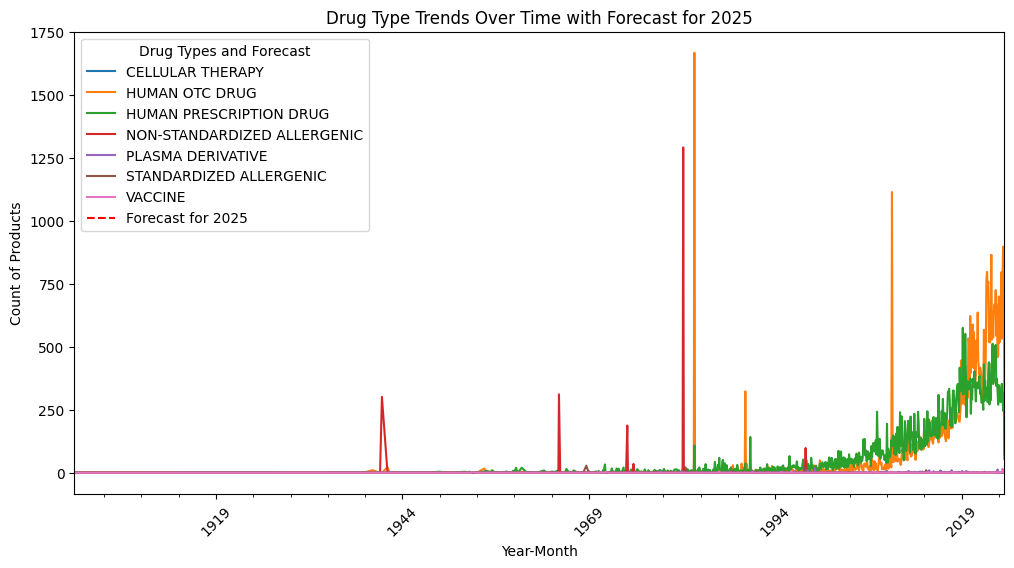

In [12]:
# Assuming you've already generated the forecast for 2025
forecast_2025 = model_fit.forecast(steps=12)

# Create a date range for the forecast
forecast_dates = pd.date_range(start='2025-01', periods=12, freq='M')

# Plot the original data (up to 2024) and the forecast for 2025
plt.figure(figsize=(12,6))
monthly_sales_pivot.plot(kind='line', figsize=(12,6), label='Historical Data')
plt.plot(forecast_dates, forecast_2025, label='Forecast for 2025', linestyle='--', color='red')

# Add labels and title
plt.title('Drug Type Trends Over Time with Forecast for 2025')
plt.xlabel('Year-Month')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)
plt.legend(title='Drug Types and Forecast')
plt.show()


<Figure size 1200x600 with 0 Axes>

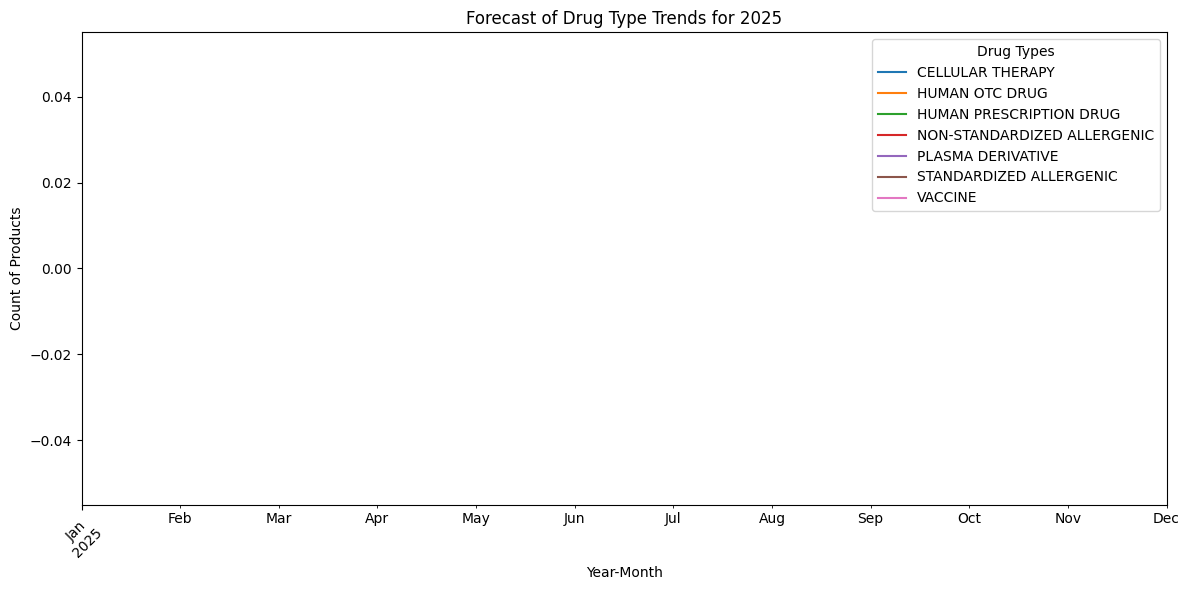

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Updated import
import numpy as np

# Load your cleaned product data (adjust path if needed)
product_df = pd.read_csv('C:/Users/j7902/Desktop/Pharma_Analysis/data/clean_product.csv')

# Ensure STARTMARKETINGDATE is a datetime format
product_df['STARTMARKETINGDATE'] = pd.to_datetime(product_df['STARTMARKETINGDATE'], errors='coerce')

# Aggregate by Year-Month
product_df['YearMonth'] = product_df['STARTMARKETINGDATE'].dt.to_period('M')

# Group by YearMonth and PRODUCTTYPENAME, and count the occurrences
monthly_sales = product_df.groupby(['YearMonth', 'PRODUCTTYPENAME']).size().reset_index(name='count')

# Pivot table to make PRODUCTTYPENAME columns and YearMonth rows
monthly_sales_pivot = monthly_sales.pivot(index='YearMonth', columns='PRODUCTTYPENAME', values='count')

# Fill missing values with 0
monthly_sales_pivot.fillna(0, inplace=True)

# Forecast for each drug type separately using ARIMA
forecast_periods = 12  # Number of months to forecast (e.g., for 2025)

# Store the forecasts
forecasts = {}

for drug_type in monthly_sales_pivot.columns:
    # Fit ARIMA model for each drug type
    model = ARIMA(monthly_sales_pivot[drug_type], order=(5,1,0))  # (p,d,q) can be tuned
    model_fit = model.fit()

    # Forecast for the future months
    forecast = model_fit.forecast(steps=forecast_periods)

    # Store the forecast results
    forecasts[drug_type] = forecast

# Create a DataFrame for the forecast results (only 2025 data)
forecast_start_date = monthly_sales_pivot.index[-1] + 1
forecast_df = pd.DataFrame(forecasts, index=pd.period_range(start=forecast_start_date, periods=forecast_periods, freq='M'))

# Filter the forecast data to only show 2025
forecast_2025 = forecast_df[forecast_df.index.year == 2025]

# Plot only the forecast for 2025
plt.figure(figsize=(12,6))
forecast_2025.plot(kind='line', figsize=(12,6))

plt.title('Forecast of Drug Type Trends for 2025')
plt.xlabel('Year-Month')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)

# Set x-axis to only display months in 2025
plt.xlim([pd.Period('2025-01', freq='M'), pd.Period('2025-12', freq='M')])

plt.legend(title='Drug Types')
plt.tight_layout()
plt.show()
